In [1]:
2

2

In [2]:
import numpy as np
import pickle


In [3]:
x, y = np.mgrid[-3:3:96j, -3:3:96j]
x = np.expand_dims(x, 0)
y = np.expand_dims(y, 0)

In [4]:
import matplotlib.pyplot as plt

In [7]:
centerx = 6 * np.random.random([10000, 1, 1]) - 3
centery = 6 * np.random.random([10000, 1, 1]) - 3


In [8]:
rgb = np.random.random([10000, 1, 1, 3])

In [9]:
data = np.zeros([10000, 96, 96, 3])

In [10]:
circles = ((x - centerx) ** 2 + (y - centery) **2) < .7

In [11]:
data[circles] = 1

In [12]:
data *= rgb

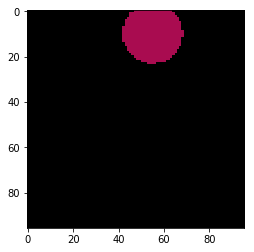

In [13]:
plt.imshow(data[5000])

In [14]:
#pickle.dump(data, open("color_circles.pickle", "wb"), protocol=4)

In [15]:
import vae

/home/hastings/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 47, 47, 32)   1568        encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 22, 22, 64)   32832       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 10, 10, 128)  131200      conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

In [16]:
vae.vae.load_weights("vae_colored_circles.h5")


In [30]:
out = vae.vae.predict(data)
out2 = vae.encoder.predict(data)

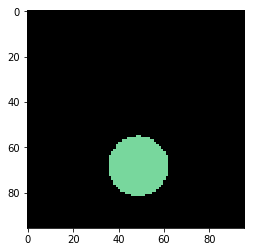

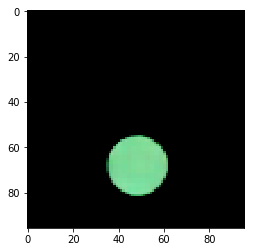

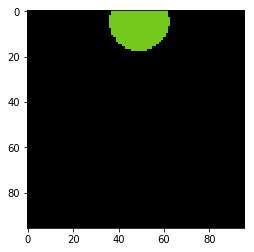

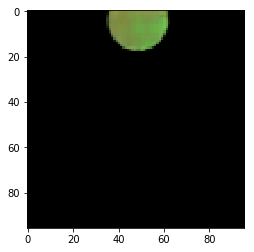

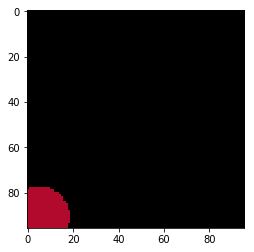

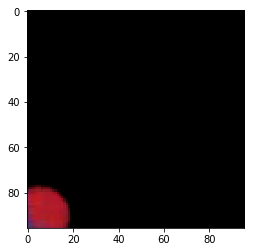

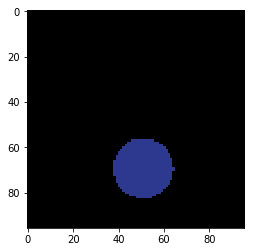

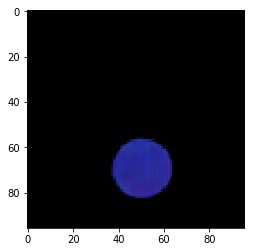

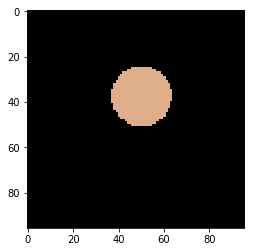

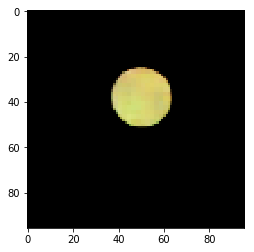

In [60]:
import random
for _ in range(5):
    j = random.randint(0, 1000)
    plt.imshow(data[j])
    plt.show()
    plt.imshow(out[j])
    plt.show()

In [20]:
x = np.random.normal(0, 1, [30, 5])
out = vae.decoder.predict(x)

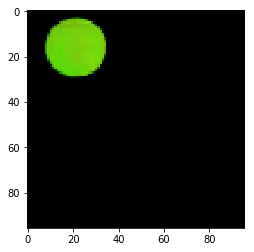

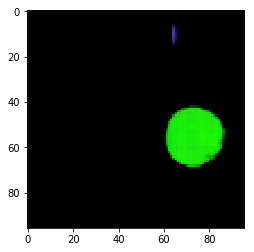

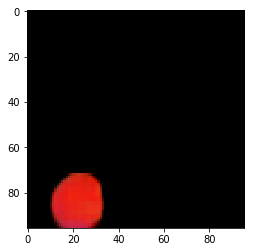

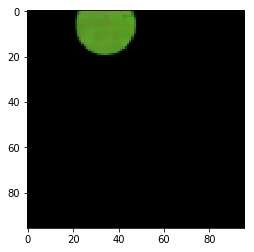

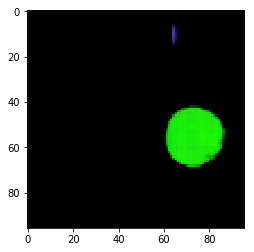

In [21]:
import random
for _ in range(5):
    j = random.randint(0, 10)
    plt.imshow(out[j])
    plt.show()

In [29]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(a, b, c, d, e):
    plt.figure(2)
    in_ = np.array([[a, b, c, d, e]])
    out = vae.decoder.predict(in_)
    plt.imshow(out[0])
    plt.show()

interactive_plot = interactive(f, a=(-2., 2.), b=(-2., 2.), c=(-2., 2.), d=(-2., 2.), e=(-2., 2.))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [32]:
out3 = out2[2]

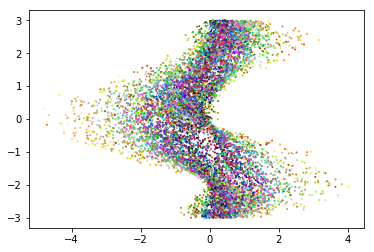

In [57]:
plt.scatter(out3[:, 2], centery[:, 0, 0], s=1, c=rgb[:, 0, 0])

In [40]:
rgb.shape

(10000, 1, 1, 3)

In [46]:
centerx.shape

(10000, 1, 1)